# **Introdution**
There are seven main types of dry beans. Included barbunya, sira, horoz, dermason, cali, bombay, and seker. Each type can be distinguished by many features such as the area of the bean zone, bean circumference, the distance between the ends of the longest line that can be drawn from a bean, and many more.
In this project we will classify a type of beans based on their features. Three classifiers will be applied, then we compare the performance of them.
The dataset that will be used in this project is Dry Beans Dataset, from Kaggle.
https://www.kaggle.com/datasets/whenamancodes/dry-beans-dataset?select=Dry+Beans+Dataset.csv



1. Import required libraries


In [1]:
# math lib
import numpy as np

# data visualization libs
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from mlxtend.plotting import scatterplotmatrix

# feature scaling libs
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# feature selection libs
from sklearn.feature_selection import SequentialFeatureSelector

# model selection lib
from sklearn.model_selection import train_test_split, GridSearchCV

# classification models
from sklearn.neighbors import KNeighborsClassifier as KNN , NearestCentroid as KNC
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree
from sklearn.svm import SVC

# metrics for model performance evaluation
from sklearn.metrics import accuracy_score, classification_report, f1_score


# **Data Description**
The dataset consists of features describing the shape of the beans. Where, the number of features in the data is 16, and the number of class is 7. Below is the attribute describtion.

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.

2.) Perimeter (P): Bean circumference is defined as the length of its border.

3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5.) Aspect ratio (K): Defines the relationship between L and l.

6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2).

12.)Compactness (CO): Measures the roundness of an object: Ed/L.

13.)ShapeFactor1 (SF1).

14.)ShapeFactor2 (SF2).

15.)ShapeFactor3 (SF3).

16.)ShapeFactor4 (SF4).

17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)



In [ ]:
df = pd.read_csv('Dry_Beans_Dataset.csv') #read data
df.head() #Disply some records

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.shape #get the shape of data

(13611, 17)

In [ ]:
df.dtypes #get the type of columns

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [ ]:
df.describe() #describe the data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
df.info() #get more information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

From above information, we can see that the data has no null values.

The plot above shows the imbalanced in data. Where, the count of dermason class is highst than the other classes. Wherese, the count of bombay class is lowest than the other classes. Due to this, we are going to use **F1-score** metrics to evaluate the performance of the classifiers, in addition to accuracy.

# **Data Visualization**
The graphical display of information and data is known as data visualization. Data visualization tools, which include visual components such as charts, graphs, and maps, make it easy to view and comprehend trends, outliers, and patterns in data. In our project, we will use seaborn library from sklearn to generate some charts about the data. First, we generate the count plot to see the number of each class, and help us to see if there is any imbalanced in data. Then, we generate the scatter plot matrix to see the relation between the features. Also, we provides a heatmap to generate the pearson correlation between the features.

In [ ]:
#define the X (features), and y (Classes).
#set x and y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(y.shape)

(13611,)


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


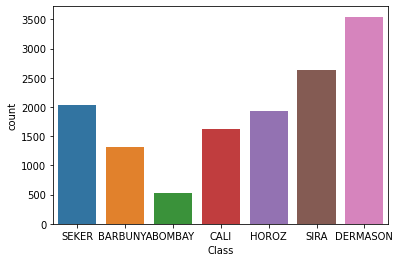

In [ ]:
# Check the Count of all beans classes
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)

From above histogram chart, we notice that the data is imbalanced, so we will use f1 score with micro avarage for evaluation and we will use cross validation.

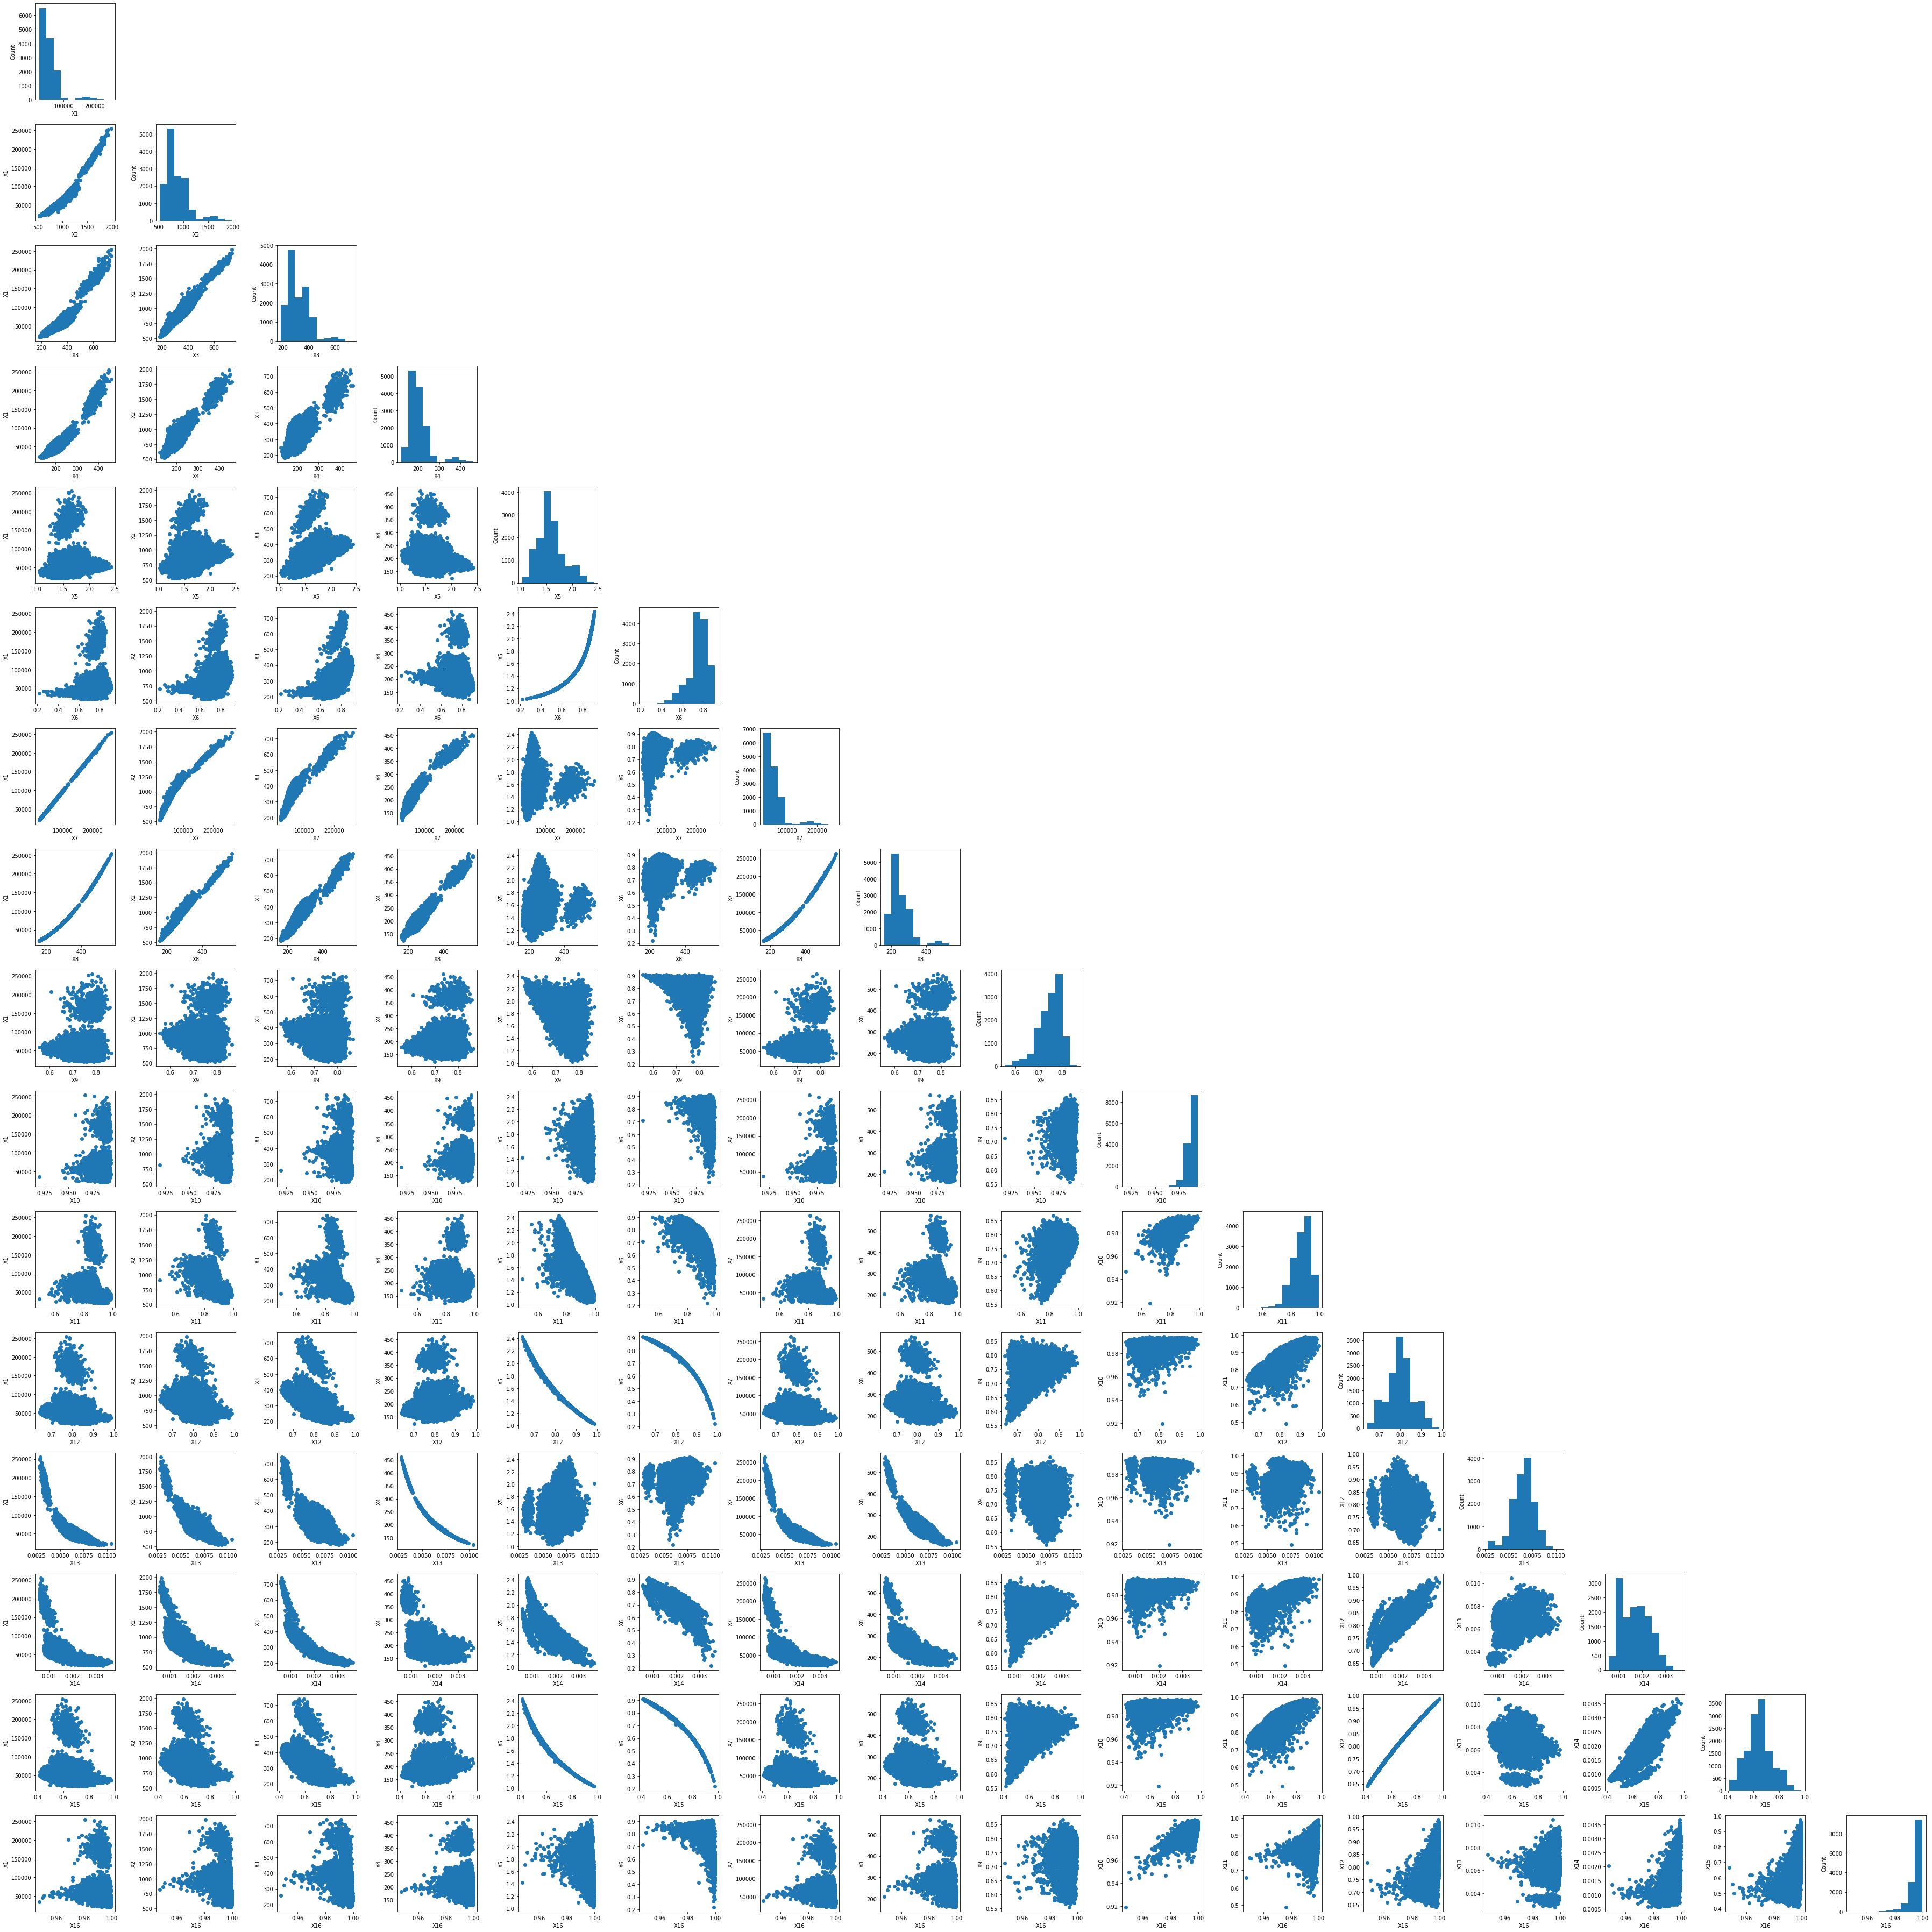

In [ ]:
#show the scatter plot of whole features
scatterplotmatrix(X, figsize=(50, 50))
plt.tight_layout()
plt.show()

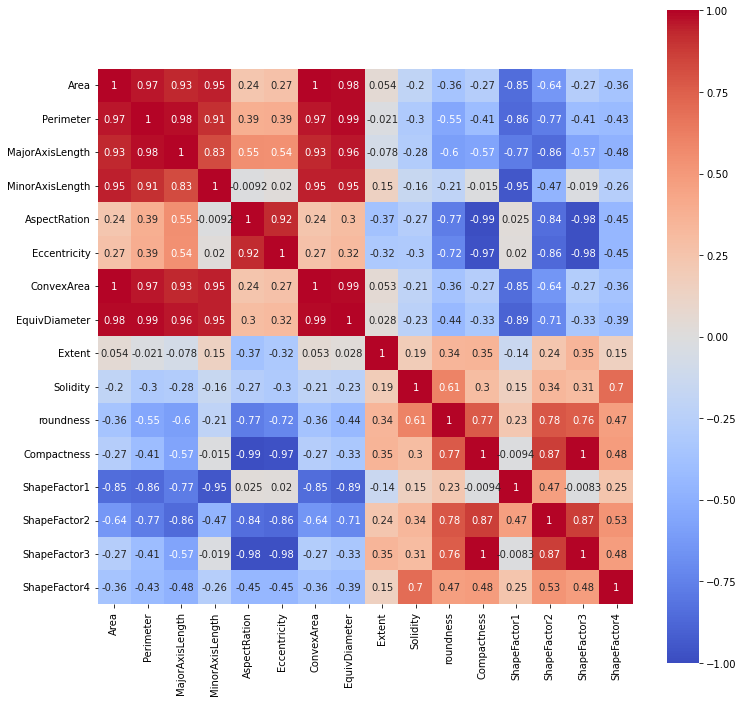

In [ ]:
#shows the pearson correlation between the features
plt.figure(figsize=(12,12))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

# **Data pre-processing**
In the next steps, we are going to prepare the data to do the classification. First, we define a function to do the data transformation. Then, we use this function to do scaling to data. Finally, we split the data into train set and test set.

In [ ]:
# Encoding
df2=df.copy()
# convert column 'Class' from object to category
df2['Class'] = df2['Class'].astype('category')
# encode the categories of seven classes to numerical values
df2['Class'] = df2['Class'].cat.codes
print(df2.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [ ]:
# Check if there are missing values

if df2.isnull().values.any():
    df2 = df2.dropna() #deleting the corresponding rows

X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values

In [ ]:
# Scaling function
def feature_scaling(x, scaler_name= 'minmax'):
  # create the scaler object
  if scaler_name.lower() == 'minmax':
    scaler = MinMaxScaler()
  if scaler_name.lower() == 'zscore':
    scaler = StandardScaler()
  # fit it to data features
  x_scaled = scaler.fit_transform(x)
  return x_scaled

In [ ]:
# perform feature scaling using minMax scalers
X_scaled = feature_scaling(X)

### Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3)
print("Train size: ",X_train.shape,'\n','Test size: ', X_test.shape)

Train size:  (9527, 16) 
 Test size:  (4084, 16)


# **Model Selection**
In order to select the best model, we select the best features sequentially, also, we select the best hyperparameter for each model. To do this, we defines two functions. The first function, return the best features. The second function, reuturn the best parameter.

In [ ]:
# function to select the best features and return the reduced data
# the fuction uses the the model and the number of feature to be selected
def feature_selection(model, n_features):
  sfs = SequentialFeatureSelector(model, n_features_to_select= n_features, direction = 'forward')
  sfs.fit(X_train, y_train)
  X_train_reduced = sfs.transform(X_train)
  X_test_reduced = sfs.transform(X_test)
  return X_train_reduced, X_test_reduced

In [ ]:
#define a function to select the best hyperparameter of the model
#the function uses the model and parameter values, with k-fold=10
def best_param(model, parameter):
  grid_search=GridSearchCV(model,parameter,scoring='accuracy',cv=10, n_jobs= -1)
  grid_search.fit(X_train,y_train)
  #l=[*parameter]
  #return the best parameter
  return grid_search.best_params_

# **KNN Classifier**

In [ ]:
## KNN before features selection.
#intialize knn object
knn = KNN(n_neighbors=1)
#fit the model
knn.fit(X_train, y_train)
#evaluate the model
y_pred = knn.predict(X_test)
#compute f-score with micro average
f1_score_knn = f1_score(y_test,y_pred, average= 'micro')
#compute the accuaracy
accuracy_knn = accuracy_score(y_pred, y_test)
print(f"Knn f1_score before features selection = {f1_score_knn:.2f}")
print(f"Knn accuracy before features selection = {accuracy_knn:.2f}")

Knn f1_score before features selection = 0.90
Knn accuracy before features selection = 0.90


From above results, we can see that the model accuracy is identical to f-score value. From accuracy, the model is able to predict 90% of beans type correctly. The error rate of the model is 10%.

In [ ]:
### dimensionality reduction using feature selection
knn1 = KNN(n_neighbors=1)
#select the best 10 features
X_train_reduced, X_test_reduced = feature_selection(knn1, 10)
knn1.fit(X_train_reduced, y_train)#fit the model
y_pred_sfs = knn1.predict(X_test_reduced)#evaluate the model
#compute f-score and the accuracy of the model
f1_score_knn1 = f1_score(y_test,y_pred_sfs, average= 'micro')
accuracy_knn1 = accuracy_score(y_pred_sfs, y_test)
print(f"Knn f1_score after applying feature selection = {f1_score_knn1:.2f}")
print(f"Knn accuracy after applying feature selection = {accuracy_knn1:.2f}")

Knn f1_score after applying feature selection = 0.91
Knn accuracy after applying feature selection = 0.91


Above results shows that the f-score and the accuracy of knn is identical to that when there is no features selection.

In [ ]:
### Grid Serach to find the best k
knn2 = KNN()
k_range = {'n_neighbors':list(range(1,20,1))}
best_k = (best_param(knn2, k_range))['n_neighbors']
print("The best k for knn is: ",best_k)
#fit the model using the best k
knn2 = KNN(n_neighbors=best_k)
#fit the model
knn2.fit(X_train_reduced, y_train)
#evaluation
y_pred2 =knn2.predict(X_test_reduced)
#compute the accuracy and f-score
f1_score_knn2 = f1_score(y_test,y_pred2, average= 'micro')
accuracy_knn2 = accuracy_score(y_pred2, y_test)
print(f"Knn f1_score after using the best parameter = {f1_score_knn2:.2f}")
print(f"Knn accuracy after using the best parameter = {accuracy_knn2:.2f}")

The best k for knn is:  17
Knn f1_score after using the best parameter = 0.92
Knn accuracy after using the best parameter = 0.92


From above result, we can see that the performance of knn is increasing, when we use the best k nighbors.

# **NearestCentroid Classifier**

In [ ]:
## NearestCentroid before using feature selection and grid search
knc = KNC()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
f1_score_knc = f1_score(y_test,y_pred, average= 'micro')
accuracy_knc = accuracy_score(y_pred, y_test)

print(f"f1_score before feature selection of scaled dataset = {f1_score_knc:.2f}")
print(f"Accuracy before feature selection of scaled dataset = {accuracy_knc:.2f}")


f1_score before feature selection of scaled dataset = 0.88
Accuracy before feature selection of scaled dataset = 0.88


In [ ]:
### dimensionality reduction using feature selection
knc1 = KNC()
#select the best 10 features
X_train_reduced, X_test_reduced = feature_selection(knc1, 10)
knc1.fit(X_train_reduced, y_train)#fit the model
y_pred_sfs = knc1.predict(X_test_reduced) #evaluate the model
#compute f1-score and the accuracy of the model
f1_score_knc1 = f1_score(y_test,y_pred_sfs, average= 'micro')
accuracy_knc1 = accuracy_score(y_pred_sfs, y_test)
print(f"Knc f1_score after applying feature selection = {f1_score_knc1:.2f}")
print(f"Knc accuracy after applying feature selection = {accuracy_knc1:.2f}")

Knc f1_score after applying feature selection = 0.90
Knc accuracy after applying feature selection = 0.90


The result above show that the performane of KNC is increasing, when we use the best 10 features. Where the accuracy and f1-score reaced 90%.

In [ ]:
### Grid Serach to find the best threshold
knc2 = KNC()
knc_param = {'shrink_threshold': np.arange(0, 1.01, 0.01)}
best_shold = (best_param( knc2 , knc_param))['shrink_threshold']
print("The best threshold for knc is: ", best_shold)
#fit the model using the best THRESHOLD
knc2 = KNC(shrink_threshold=best_shold)
#fit the model
knc2.fit(X_train_reduced, y_train)
#evaluation
y_pred2 =knc2.predict(X_test_reduced)
#compute the accuracy and f1-score
f1_score_knc2 = f1_score(y_test,y_pred2, average= 'micro')
accuracy_knc2 = accuracy_score(y_pred2, y_test)
print(f"Knc f1_score after using the best threshold = {f1_score_knc2:.2f}")
print(f"Knn accuracy after using the best threshold = {accuracy_knc2:.2f}")

The best threshold for knc is:  1.0
Knc f1_score after using the best threshold = 0.90
Knn accuracy after using the best threshold = 0.90


The result above show that the performance of knc is increasing when we use the best shrink threshold, compared to one that is not using shrink threshold.

# **Decision Tree Classifier**

In [ ]:
## Decision Tree Classification
dtc = DTC(random_state=0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
f1_score_dtc =f1_score(y_test,y_pred, average= 'micro')
accuracy_dtc = accuracy_score(y_pred, y_test)
print(f" DTC f1-score before feature selection of scaled dataset = {f1_score_dtc:.2f}")
print(f" DTC accuracy before feature selection of scaled dataset = {accuracy_dtc:.2f}")

 DTC f1-score before feature selection of scaled dataset = 0.90
 DTC accuracy before feature selection of scaled dataset = 0.90


In [ ]:
### dimensionality reduction using feature selection
dtc1 = DTC()
#select the best 10 features
X_train_reduced, X_test_reduced = feature_selection(dtc1, 10)
dtc1.fit(X_train_reduced, y_train)#fit the model
y_pred_sfs = dtc1.predict(X_test_reduced)#evaluate the model
#compute f-score and the accuracy of the model
f1_score_dtc1 = f1_score(y_test,y_pred_sfs, average= 'micro')
accuracy_dtc1 = accuracy_score(y_pred_sfs, y_test)
print(f"DTC accuracy after applying feature selection = {accuracy_dtc1:.2f}")
print(f"DTC f1_score after applying feature selection = {f1_score_dtc1:.2f}")

DTC accuracy after applying feature selection = 0.89
DTC f1_score after applying feature selection = 0.89


From above results, we can see that the performance of decision tree classifier is keep same after select the best 10 features.

In [ ]:
# Grid search to select the best maximum depth for decision tree classifier
dtc2 = DTC()
dtc_params={'max_depth':list(range(4,20))}
best_depth = (best_param( dtc2 , dtc_params))['max_depth']
print("The best maximum depth for dtc is: ",best_depth)
#fit the model using the best alpha
dtc2 = DTC(max_depth=best_depth)
#fit the model
dtc2.fit(X_train, y_train)
#evaluation
y_pred2 =dtc2.predict(X_test)
#compute the accuracy and f-score
f1_score_dtc2 = f1_score(y_test,y_pred2, average= 'micro')
accuracy_dtc2 = accuracy_score(y_pred2, y_test)
print(f"Dtc f1_score after using the best maximum depth = {f1_score_dtc2:.2f}")
print(f"Dtc accuracy after using the best maximum depth= {accuracy_dtc2:.2f}")

The best maximum depth for dtc is:  9
Dtc f1_score after using the best maximum depth = 0.91
Dtc accuracy after using the best maximum depth= 0.91


From the result above we can see that the performance of decision tree classifier is increasing after selecting the best maximum depth.

# **Support Vector Classifier**

In [ ]:
## Super vector before using feature selection and grid search
svc = SVC()
svc.fit(X_train, y_train)
accuracy_svc = svc.score(X_test, y_test)
print(f"Score before feature selection of scaled dataset = {accuracy_svc:.2f}")

Score before feature selection of scaled dataset = 0.92


In [ ]:
### dimensionality reduction using feature selection
svc1 = SVC()
#select the best 10 features
X_train_reduced, X_test_reduced = feature_selection(svc1, 10)
svc1.fit(X_train_reduced, y_train)#fit the model
#compute score and the accuracy of the model
accuracy_svc1 = svc1.score(X_test_reduced, y_test)
print(f"SVC accuracy after applying feature selection = {accuracy_svc1:.2f}")

SVC accuracy after applying feature selection = 0.92


In [ ]:
# Grid search to select the best C, gammma, and kernal.
svc2 = SVC()
svc_params={'C': np.arange(1.0,100.0,10.0)}

best_C = (best_param( svc2 , svc_params))['C']
print("The best C for SVC is: ",best_C)

#fit the model using the best C, gamma and kernal
svc2 = SVC(C=best_C)
#fit the model
svc2.fit(X_train, y_train)
#evaluation
#compute the accuracy and f-score
accuracy_svc2 = svc2.score(X_test,y_test)
print(f"SVC score after using the best C, gamma and kernal = {accuracy_svc2:.2f}")

The best C for SVC is:  71.0
SVC score after using the best C, gamma and kernal = 0.93


In [ ]:
# display the result as DataFrame
dict = {'K Nearest Neighbors': [accuracy_knn, accuracy_knn1, accuracy_knn2 ],
        'K Nearest Centroid' : [accuracy_knc, accuracy_knc1, accuracy_knc2 ],
        'Decision Tree' : [accuracy_dtc, accuracy_dtc1, accuracy_dtc2 ],
        'Support Vector ' :[accuracy_svc, accuracy_svc1, accuracy_svc2 ]
        }
df_result = pd.DataFrame(dict)
df_result.index=['Acuracy before features selection','Accuracy after features selection','Accuracy after grid search']
print(df_result)

                                   K Nearest Neighbors  K Nearest Centroid  \
Acuracy before features selection             0.901322            0.875857   
Accuracy after features selection             0.907444            0.895690   
Accuracy after grid search                    0.923115            0.897160   

                                   Decision Tree  Support Vector   
Acuracy before features selection       0.895201         0.921890  
Accuracy after features selection       0.889569         0.924584  
Accuracy after grid search              0.906954         0.929971  


In conclusion, we obtained the performance of classifiers according to three cases. First, we obtained the accuracy of each classifier before applying feature selection. Then, we obtained the accuracy of each of them after selecting the best 10 features. Finally, we continue with the best accuracy from the previous two cases, to obtain the accuracy after selecting the best value of hyperparameter for each classifier using a grid search algorithm. We found that SVM has the highest performance compared to other classifiers, followed by KNN, then DTC, then KNC.